In [2]:
!pwd

/home/br/sweethome/ferm/worm_disord/analyze


In [59]:
import io

import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

## Read in the `res` lines

In [65]:
def read_res(fnames):
    """Read the `res_SUFFIX` files for a collection of replicas."""
    
    firstline = "replica_id ndens ndens_err ndens_conv gim gim_err gim_conv Z(mln)"
    lines = [firstline]

    for fname in fnames:
        with open(fname, 'r') as f:
            line = f.read()
            #line.spline
        lines.append(" ".join(line.split()))

    lines
    buffer = io.StringIO("\n".join(lines))
    df = pd.read_csv(buffer, sep="\s+")
    return df

### $L=6$, $\beta = 3.5$

In [70]:
reslines = !ls ../runs/L6b3.5/res*
print(reslines)
df = read_res(reslines)
df

['../runs/L6b3.5/res_L6b3.5r10a0.1.dat', '../runs/L6b3.5/res_L6b3.5r1a0.1.dat', '../runs/L6b3.5/res_L6b3.5r2a0.1.dat', '../runs/L6b3.5/res_L6b3.5r3a0.1.dat', '../runs/L6b3.5/res_L6b3.5r4a0.1.dat', '../runs/L6b3.5/res_L6b3.5r5a0.1.dat', '../runs/L6b3.5/res_L6b3.5r6a0.1.dat', '../runs/L6b3.5/res_L6b3.5r7a0.1.dat', '../runs/L6b3.5/res_L6b3.5r8a0.1.dat', '../runs/L6b3.5/res_L6b3.5r9a0.1.dat']


,replica_id,ndens,ndens_err,ndens_conv,gim,gim_err,gim_conv,Z(mln)
0,10,0.177461,0.001515,F,0.077491,0.001959,T,17.392325
1,1,0.169281,0.001079,T,0.069597,0.001549,F,32.745837
2,2,0.167810,0.001307,T,0.071723,0.001795,T,27.359290
3,3,0.172144,0.001552,T,0.072996,0.001399,T,31.534403
4,4,0.186519,0.001411,T,0.087176,0.002395,T,19.523630
5,5,0.164360,0.000808,T,0.066462,0.001156,T,38.641605
6,6,0.180415,0.001808,T,0.082018,0.002332,T,16.379230
7,7,0.160634,0.000920,T,0.063697,0.001386,T,40.147440
8,8,0.179847,0.001245,T,0.080623,0.002194,T,16.639354
9,9,0.159854,0.001013,T,0.061367,0.000994,T,41.245021


## Resample

In [62]:
def resample(mean, err, num_samples=100000, seed=1234):
    """Compute the average over a `mean` array w/synthetic datasets.
    
    Generate synthetic datasets of `num_samples` samples and average.
    
    Parameters
    ----------
    mean : array_like
        Mean values.
    err : array_like
        Errorbars.
    num_samples : int
        Generate sythetic datasets of this many samples
        for each element of `mean` and arr.
    seed : int
        np.random seed
        
    """
    mean, err = map(np.asarray, (mean, err))
    num_meas = mean.size
    synth = np.empty((num_meas, num_samples), dtype=float)
    
    rndm = np.random.RandomState(seed)
    for j in range(num_meas):
        synth[j, :] = rndm.normal(mean[j], err[j], size=num_samples)
        
    return synth.sum(axis=0) / num_meas

In [63]:
samples = resample(df["gim"], df["gim_err"])

In [55]:
sum(df["gim"])/len(df["gim"])

0.07331509885742325

<IPython.core.display.Javascript object>


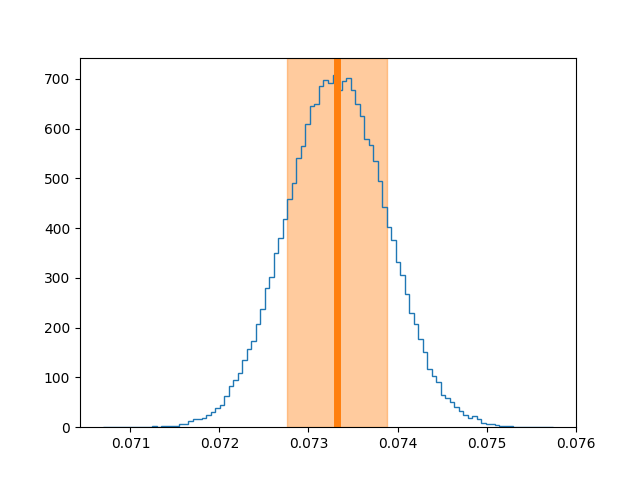

0.073315056719348 +/- 0.0005619132125666924


In [64]:
plt.hist(samples, density=True, bins=100, histtype='step')

m, s = samples.mean(), samples.std()

plt.axvline(m, lw=5, color='C1')
plt.axvspan(m-s, m+s, alpha=0.4, color='C1')

print(m, '+/-', s)